Tapia Ramirez Jair - 9CV11

Detección de bordes y esquinas 

Imagen Real


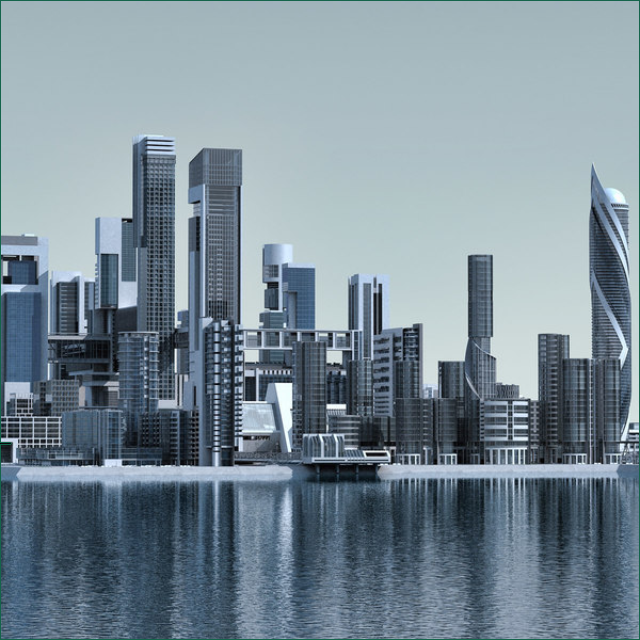

Escala de grises


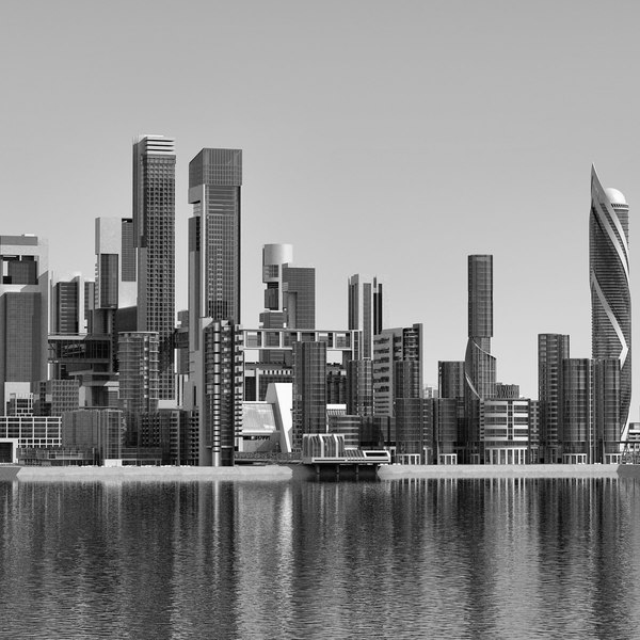

Umbral


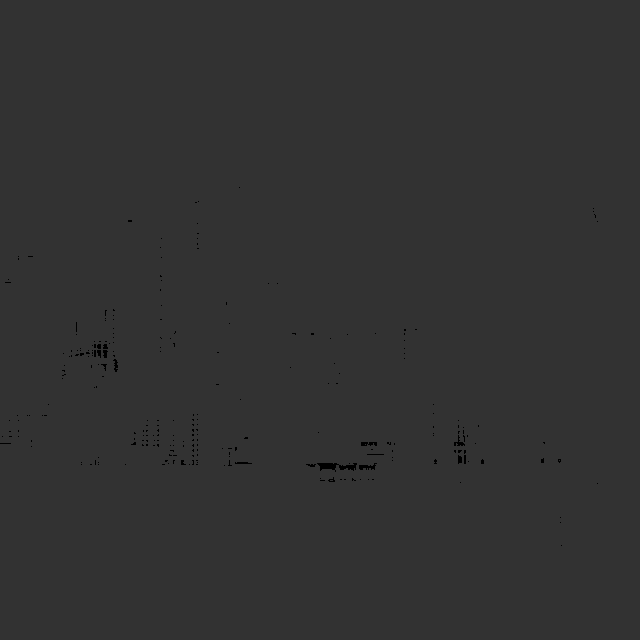

Bordes


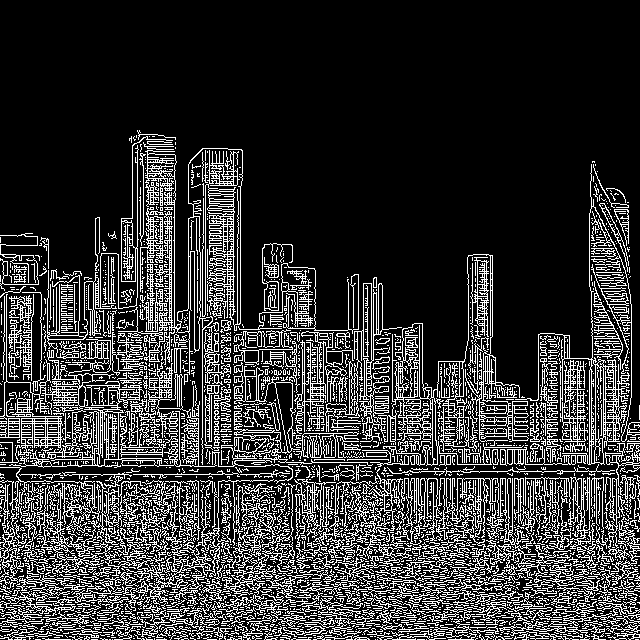

Esquinas


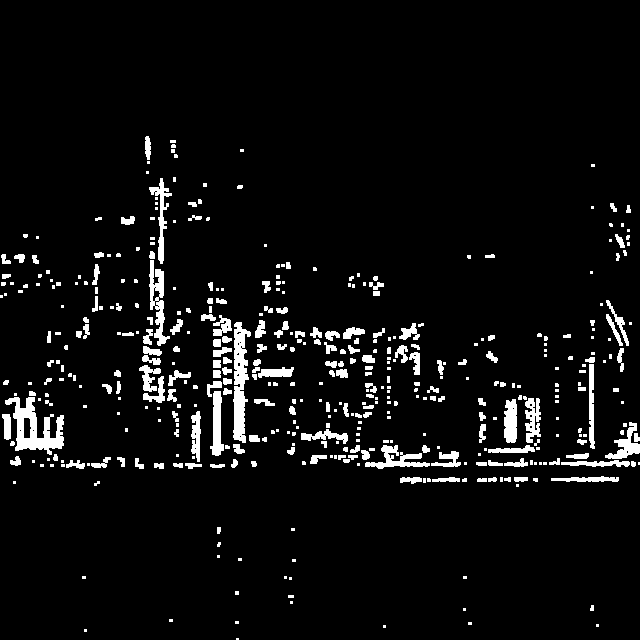

Bordes y Esquinas


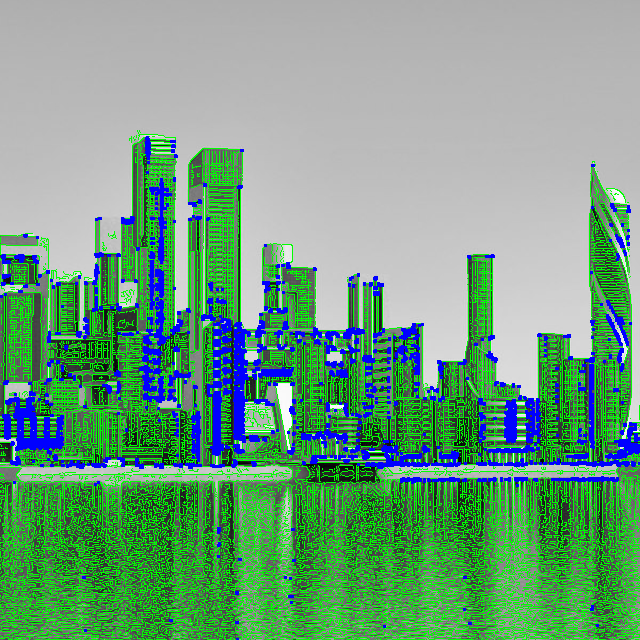

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

imagen = cv2.imread('img1.jpg')
imagen = cv2.resize(imagen, (640, 640))

IGS = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
kernel = np.ones((1, 1))
imagenD = cv2.dilate(IGS, kernel, iterations=1)
cv2.imwrite('IGS.jpg', IGS)

zeros = np.zeros(imagen.shape[:2], dtype="uint8")
imgCorners = cv2.merge([zeros, zeros, zeros])

imagen = cv2.imread('img1.jpg')
imagen = cv2.resize(imagen, (640, 640))
CorAndCan = cv2.merge([IGS, IGS, IGS])
imgCorners = cv2.merge([zeros, zeros, zeros])
imgCanny = cv2.merge([zeros, zeros, zeros])

thresholdinf = 15
thresholdsup = 50
dilated = 1
Bs = 2
s = 3
k = 4/100

if(dilated > 0):
    kernel = np.ones((dilated, dilated))
    imagenD = cv2.dilate(IGS, kernel, iterations=1)

imgCanny = cv2.Canny(imagenD, thresholdinf, thresholdsup)

ret, thresh = cv2.threshold(
    imagenD, thresholdinf, thresholdsup, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

corners = cv2.cornerHarris(imagenD, Bs, s, k)
corners = cv2.dilate(corners, None)

imgCorners[corners > 0.01*corners.max()] = [255, 255, 255]

CorAndCan[imgCanny > 0] = [0, 255, 0]
CorAndCan[corners > 0.01*corners.max()] = [255, 0, 0]

cv2.drawContours(imagen, contours, -1, (75, 100, 20), 1)

print("Imagen Real")
cv2_imshow(imagen)
print("Escala de grises")
cv2_imshow(imagenD)
print("Umbral")
cv2_imshow(thresh)
print("Bordes")
cv2_imshow(imgCanny)
print("Esquinas")
cv2_imshow(imgCorners)
print("Bordes y Esquinas")
cv2_imshow(CorAndCan)

cv2.waitKey(0)
cv2.destroyAllWindows()

